In [3]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    "Eigenschaft": [
        "Zugfestigkeit MPa (DIN EN 61) Bidirektional", 
        "Zugfestigkeit MPa (DIN EN 61) Unidirektional", 
        "E-Modul Zugversuch GPa (DIN EN 61) Bidirektional", 
        "E-Modul Zugversuch GPa (DIN EN 61) Unidirektional", 
        "Druckfestigkeit MPa (DIN 534554) Bidirektional", 
        "Druckfestigkeit MPa (DIN 534554) Unidirektional"
    ],
    "Glas_Von": [330, 590, 19, 24, 310, 480],
    "Glas_Bis": [400, 680, 21, 35, 440, 600],
    "Kohlenstoff_Von": [560, 950, 52, 90, 450, 600],
    "Kohlenstoff_Bis": [650, 1100, 58, 100, 520, 800]
}

df = pd.DataFrame(data)
df


Eigenschaft  Glas_Von  Glas_Bis  \
0        Zugfestigkeit MPa (DIN EN 61) Bidirektional       330       400   
1       Zugfestigkeit MPa (DIN EN 61) Unidirektional       590       680   
2   E-Modul Zugversuch GPa (DIN EN 61) Bidirektional        19        21   
3  E-Modul Zugversuch GPa (DIN EN 61) Unidirektional        24        35   
4     Druckfestigkeit MPa (DIN 534554) Bidirektional       310       440   
5    Druckfestigkeit MPa (DIN 534554) Unidirektional       480       600   

   Kohlenstoff_Von  Kohlenstoff_Bis  
0              560              650  
1              950             1100  
2               52               58  
3               90              100  
4              450              520  
5              600              800

/tmp/ipykernel_330255/1871558721.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


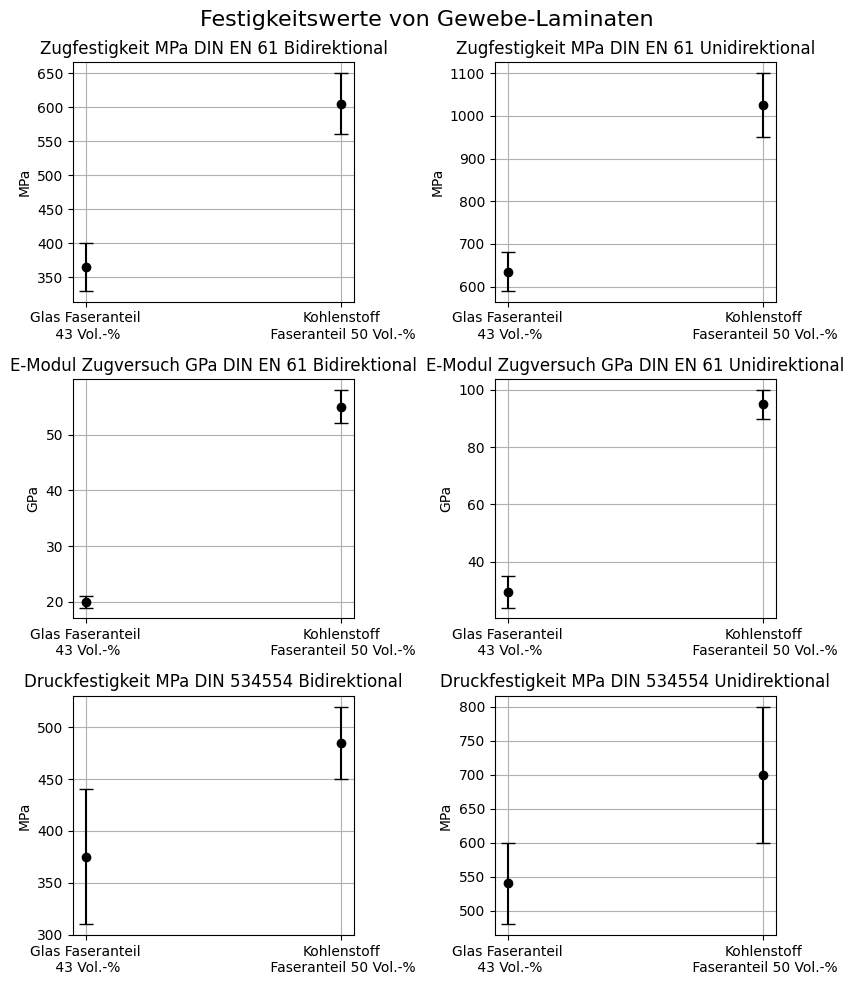

In [31]:
# Erstellen von Subplots mit noch engerem Abstand auf der x-Achse
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(8.5, 10), constrained_layout=True)
# Gesamtüberschrift hinzufügen
fig.suptitle('Festigkeitswerte von Gewebe-Laminaten', fontsize=16)


for i, eigenschaft in enumerate(df['Eigenschaft']):
    row = i // 2
    col = i % 2
    # Weiteres Verringern des Abstands auf der x-Achse
    x_positions = [0.45, 0.55]  # Glas und Kohlenstoff sehr nah beieinander
    axs[row, col].errorbar(x_positions[0], df.loc[i, 'Glas_Mittel'], yerr=df.loc[i, 'Glas_Fehler'], fmt='o', color='black', capsize=5)
    axs[row, col].errorbar(x_positions[1], df.loc[i, 'Kohlenstoff_Mittel'], yerr=df.loc[i, 'Kohlenstoff_Fehler'], fmt='o', color='black', capsize=5)
    axs[row, col].set_title(eigenschaft)
    axs[row, col].grid(True)
    axs[row, col].set_xticks(x_positions)
    axs[row, col].set_xticklabels(['Glas Faseranteil\n 43 Vol.-%', 'Kohlenstoff\n Faseranteil 50 Vol.-%'])

    # Einheiten an den Achsen anpassen
    if "MPa" in eigenschaft:
        axs[row, col].set_ylabel('MPa')
    elif "GPa" in eigenschaft:
        axs[row, col].set_ylabel('GPa')

plt.tight_layout()
plt.savefig('Gewebe-Laminate_Festigkeitswerte.png')
plt.show()


